In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "../datasets/DC_Properties.csv"

dchousing_df = pd.read_csv(filepath)
dchousing_df.head()

C:\Users\eyosa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
dchousing_df.keys()

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
#replace empty cells with average of column
dchousing_df["PRICE"].fillna(dchousing_df["PRICE"].mean(), inplace=True)

In [5]:
#drop rows with any missing data
dchousing_df_no_missing = dchousing_df.dropna()
dchousing_df_no_missing

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


In [6]:
df2 = dchousing_df.drop(['Unnamed: 0',  'HF_BATHRM',  'NUM_UNITS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK','ROOMS',     'WARD', 'SQUARE', 'X', 'Y','BATHRM','HEAT','AC' , 'QUADRANT'], axis=1)

In [7]:
df2.head()

,PRICE
0,1.095000e+06
1,9.313516e+05
2,2.100000e+06
3,1.602000e+06
4,9.313516e+05


In [8]:
#check if any missing values in the data
df2.count()

PRICE    158957
dtype: int64

In [9]:
type('PRICE')

str

In [10]:
#total missing values
df2.isnull().sum()

PRICE    0
dtype: int64

In [11]:
#descriptive statistics
df2.describe()

,PRICE
count,1.589570e+05
mean,9.313516e+05
std,5.550558e+06
min,1.000000e+00
25%,3.390000e+05
50%,7.475000e+05
75%,9.313516e+05
max,1.374275e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D19AA7FD0>]],
      dtype=object)

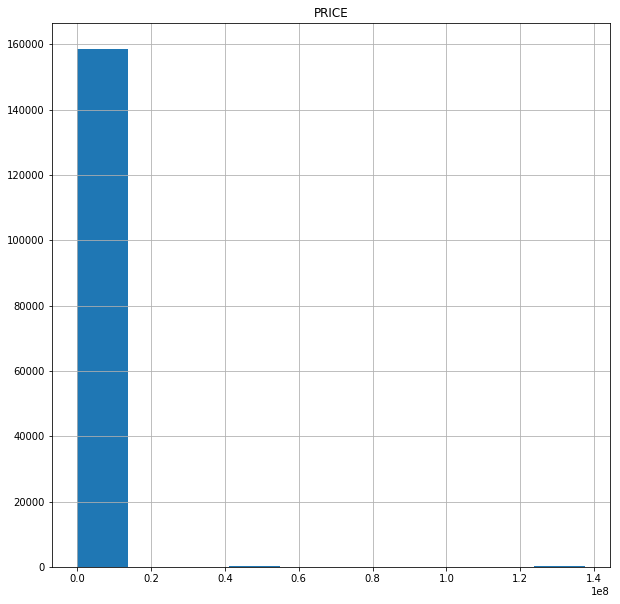

In [12]:
#plot the frequency count for each column
df2.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D191C74E0>]],
      dtype=object)

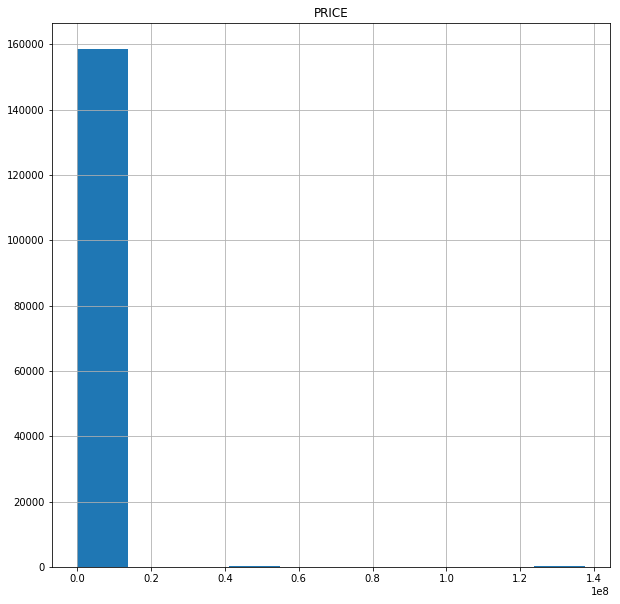

In [13]:
#plot frequency count data but using the same scale (minimum and maximum value out of all columns)
df2.hist(figsize=(10,10), sharex=True)

In [14]:
#first 5 rows of the 'PRICE' column
df2['PRICE'].head()

0    1.095000e+06
1    9.313516e+05
2    2.100000e+06
3    1.602000e+06
4    9.313516e+05
Name: PRICE, dtype: float64

In [15]:
#Method 1: manual calculation of z-scores for 'PRICE' column

#mean for the column
mean = df2['PRICE'].mean()

#standard deviation of the column
std = df2['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
PRICE_z_manual = (df2['PRICE'] - mean)/std

In [16]:
#values for mean and standard deviation of 'Glucose column'
mean, std

(931351.5949342768, 5550558.004606821)

In [17]:
#first 5 rows of z-score standardized 'Glucose' column
PRICE_z_manual.head()

0    2.948323e-02
1   -1.191092e-13
2    2.105461e-01
3    1.208254e-01
4   -1.191092e-13
Name: PRICE, dtype: float64

In [18]:
PRICE_z_manual.describe()

count    1.589570e+05
mean    -1.121520e-13
std      1.000000e+00
min     -1.677940e-01
25%     -1.067193e-01
50%     -3.312308e-02
75%     -1.191092e-13
max      2.459144e+01
Name: PRICE, dtype: float64

In [19]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
PRICE_zscore = scaler.fit_transform(df2[['PRICE']])

In [20]:
#mean and standard deviation of z-score standardized 'Glucose' column
PRICE_zscore.mean(), PRICE_zscore.std()

(2.6641385438390238e-17, 1.0000000000000002)

In [21]:
PRICE_zscore[:5]

array([[2.94833276e-02],
       [2.09736909e-17],
       [2.10546774e-01],
       [1.20825783e-01],
       [2.09736909e-17]])

In [22]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
price_z_col = pd.Series(PRICE_zscore.reshape(-1))

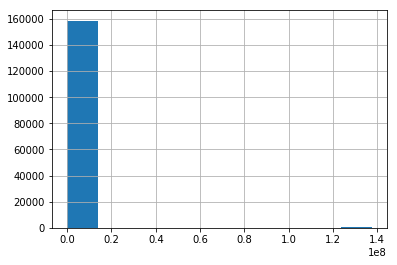

In [23]:
#BEFORE: frequency count plot of 'Glucose' column
df2['PRICE'].hist()

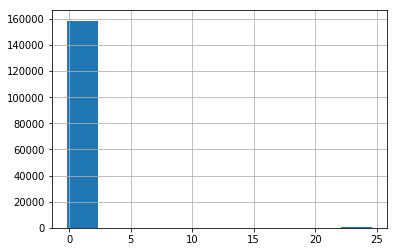

In [24]:
#AFTER: frequency count plot of 'Glucose' column (z-score standardization)
#range is much smaller
price_z_col.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D1AB23D68>]],
      dtype=object)

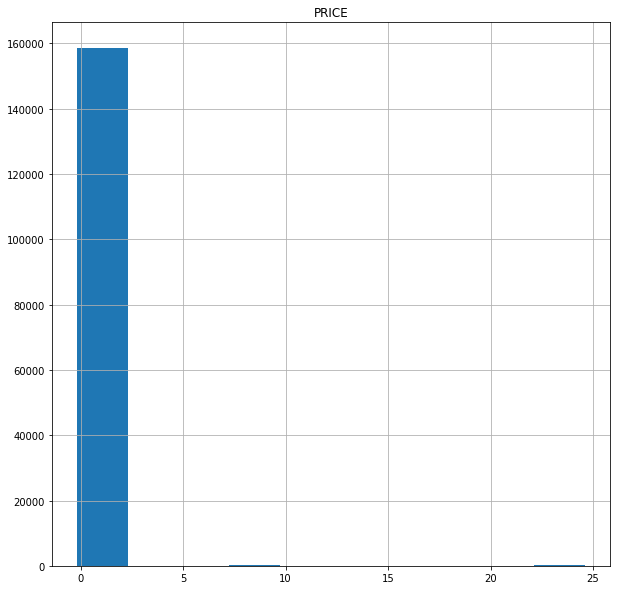

In [25]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(df2.columns)

#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(df2), columns = colnames)

#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True)

# Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

### \begin{align}  m = \frac{(value - min)}{max - min} \end{align}

In [26]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [27]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
PRICE_minmax = minmax_sc.fit_transform(df2[['PRICE']])
###the double square braket in (pima_df[['Glucose']]) is to show the double dimmensional 

In [28]:
#mean and standard deviation of Min-Max 'Glucose' column
PRICE_minmax.mean(), PRICE_minmax.std()

(0.0067770300467104, 0.04038885061696727)

In [29]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
glu_mm_col = pd.Series(PRICE_minmax.reshape(-1))
glu_mm_col.head()

0    0.007968
1    0.006777
2    0.015281
3    0.011657
4    0.006777
dtype: float64

In [30]:
#verify the range is between 0 and 1
glu_mm_col.min(), glu_mm_col.max()

(0.0, 0.9999999999999999)

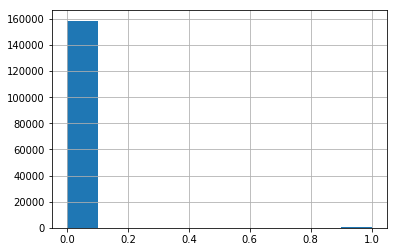

In [31]:
glu_mm_col.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D1ABA44E0>]],
      dtype=object)

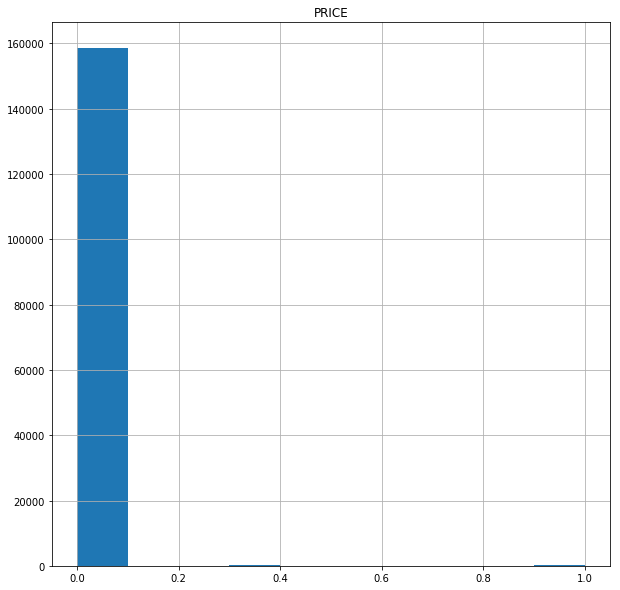

In [32]:
#show min-max scaling for all columns

#calculate z-scores
minmax_df = pd.DataFrame(minmax_sc.fit_transform(df2), columns = colnames)

#plot frequency distribution with same scale range
minmax_df.hist(figsize=(10,10), sharex=True)